<a href="https://colab.research.google.com/github/himanshutyagi2020/Tensorflow/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
keras.__version__

'2.6.0'

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784',version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X,y = mnist['data'],mnist['target']

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
import matplotlib as mpl

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
some_digit=X[0]

In [ ]:
some_digit_image = some_digit.reshape(28,28)

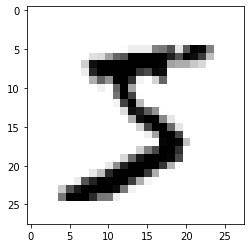

In [ ]:
plt.imshow(some_digit_image,cmap="binary")

(0.0, 1.0, 0.0, 1.0)

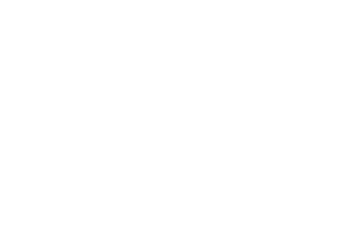

In [ ]:
plt.axis("off")

In [ ]:
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
y =y.astype(np.uint8)

In [ ]:
X_train,X_test,y_train,y_test=X[:60000], X[60000:], y[:60000],y[60000:]

In [ ]:
y_train_5 = (y_train ==5)

In [ ]:
y_test_5 = (y_test ==5)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

Performance **measures**

Implementing Cross-Validation

In [ ]:
from sklearn.model_selection import  StratifiedKFold

In [ ]:
from sklearn.base import clone

In [ ]:
skfolds = StratifiedKFold(n_splits=3, random_state= 42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_folds= X_train[train_index]
  y_train_folds= y_train_5[train_index]
  X_test_fold= X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


StratifiedKfold class performs

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

96% Accuracy!!! great...